<a href="https://colab.research.google.com/github/DCandelero/GoogleColab-Coronavirus/blob/master/Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Leitura e concatenação dos dados

In [ ]:
# Connect to the drive.
from google.colab import drive
drive.mount('/content/gdrive')

# Change root path to the cancers dataset
root_path = 'gdrive/My Drive/DataSets/HIST_PAINEL_COVIDBR_09jun2021'

Mounted at /content/gdrive


In [ ]:
data_files = glob.glob(root_path + "/*.csv")
data_files_list = []

# Leitura de todos os arquivos e concatenação em um único dataframe
for fs in data_files:
  df = pd.read_csv(fs, sep=';')
  data_files_list.append(df)
data = pd.concat(data_files_list, axis=0, ignore_index=True)

data.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,NaN,NaN,NaN


Resumo antes da limpeza

In [ ]:
print(data.shape)
print(min(data["data"]))
print(max(data["data"]))
print("Número total de registros: ", data.shape[0])
print("Tais registros foram coletados entre as datas {} e {}".format(min(data["data"]), max(data["data"])))

(2473230, 17)
2020-02-25
2021-06-09
Número total de registros:  2473230
Tais registros foram coletados entre as datas 2020-02-25 e 2021-06-09


# Limpeza dos dados

In [ ]:
# Retirando colunas desnecessárias
clean_data = data.drop(["municipio", "coduf", "codmun", "codRegiaoSaude", "nomeRegiaoSaude"], axis=1)

# Limpando dados NaN
clean_data.dropna(subset=['estado', 'interior/metropolitana'], inplace=True)

clean_data.head()

,regiao,estado,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
4551,Norte,RO,2020-03-27,13,22945.0,0.0,0,0,0,NaN,NaN,0.0
4552,Norte,RO,2020-03-28,13,22945.0,0.0,0,0,0,NaN,NaN,0.0
4553,Norte,RO,2020-03-29,14,22945.0,0.0,0,0,0,NaN,NaN,0.0
4554,Norte,RO,2020-03-30,14,22945.0,0.0,0,0,0,NaN,NaN,0.0
4555,Norte,RO,2020-03-31,14,22945.0,0.0,0,0,0,NaN,NaN,0.0


Resumo após a limpeza

In [ ]:
print(clean_data.shape)
print(min(clean_data["data"]))
print(max(clean_data["data"]))
print("Número total de registros: ", clean_data.shape[0])
print("Tais registros foram coletados entre as datas {} e {}".format(min(clean_data["data"]), max(clean_data["data"])))

(2450800, 12)
2020-03-27
2021-06-09
Número total de registros:  2450800
Tais registros foram coletados entre as datas 2020-03-27 e 2021-06-09


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2450800 entries, 4551 to 2473229
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   regiao                  object 
 1   estado                  object 
 2   data                    object 
 3   semanaEpi               int64  
 4   populacaoTCU2019        float64
 5   casosAcumulado          float64
 6   casosNovos              int64  
 7   obitosAcumulado         int64  
 8   obitosNovos             int64  
 9   Recuperadosnovos        float64
 10  emAcompanhamentoNovos   float64
 11  interior/metropolitana  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 243.1+ MB


In [ ]:
clean_data.describe()

,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
count,2.450800e+06,2.450800e+06,2.450800e+06,2.450800e+06,2.450800e+06,2.450800e+06,0.0,0.0,2.450800e+06
mean,2.561136e+01,3.772839e+04,1.154394e+03,6.970928e+00,3.169205e+01,1.952991e-01,NaN,NaN,6.929982e-02
std,1.445562e+01,2.214382e+05,8.306471e+03,1.103306e+02,3.366303e+02,6.508996e+00,NaN,NaN,2.539633e-01
min,1.000000e+00,7.810000e+02,0.000000e+00,-4.781500e+04,0.000000e+00,-4.109000e+03,NaN,NaN,0.000000e+00
25%,1.500000e+01,5.446000e+03,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
50%,2.300000e+01,1.163100e+04,1.650000e+02,0.000000e+00,3.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00
75%,3.800000e+01,2.549200e+04,5.990000e+02,3.000000e+00,1.200000e+01,0.000000e+00,NaN,NaN,0.000000e+00
max,5.300000e+01,1.225202e+07,8.022320e+05,4.781500e+04,3.143600e+04,4.109000e+03,NaN,NaN,1.000000e+00


# Números de novos casos por região

In [ ]:
# Agrupando por região e somando todos os valores de cada coluna
group_regiao_cases = clean_data.groupby(['regiao']).sum()

group_regiao_cases.reset_index(inplace=True)
group_regiao_cases

,regiao,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Centro-Oeste,5262623,7.170713e+09,3.075464e+08,1769736,6780092,44936,0.0,0.0,12760.0
1,Nordeste,20216586,2.511153e+10,6.977685e+08,4015415,18350998,98817,0.0,0.0,51040.0
2,Norte,5071050,8.109631e+09,3.219627e+08,1639007,7901695,41852,0.0,0.0,20680.0
3,Sudeste,18796692,3.888343e+10,1.022401e+09,6408090,35405381,220632,0.0,0.0,53680.0
4,Sul,13421379,1.318943e+10,4.795102e+08,3252102,9232707,72402,0.0,0.0,31680.0


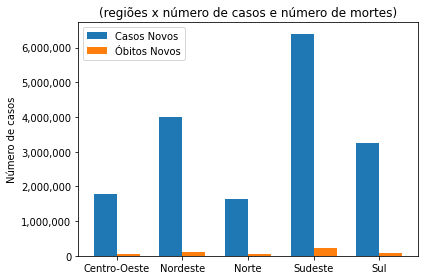

In [ ]:
regiao = group_regiao_cases['regiao']
novos_casos = group_regiao_cases['casosNovos']
novos_obitos = group_regiao_cases['obitosNovos']

x = np.arange(len(regiao))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, novos_casos, width, label='Casos Novos')
rects2 = ax.bar(x + width/2, novos_obitos, width, label='Óbitos Novos')

ax.set_ylabel('Número de casos')
ax.set_title('(regiões x número de casos e número de mortes)')
ax.set_xticks(x)
ax.set_xticklabels(regiao)
ax.legend()

import matplotlib
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.tight_layout()

plt.show()



# Semana com maior numero de casos de cada estado

In [ ]:
# Criando index para as semanas epidemiológicas para não acumular as semanas de diferentes anos
def getIdxSemanaEpi(semanaEpi, data):
  if (data < '2020-12-31' or semanaEpi % 53 == 0):
    return semanaEpi
  else:
    return semanaEpi + 53

# Coluna criada com os novos index para semanas epidemiológicas
clean_data['idxSemanaEpi'] = clean_data.apply(lambda row: getIdxSemanaEpi(row.semanaEpi, row.data), axis=1)
clean_data

,regiao,estado,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,idxSemanaEpi
4551,Norte,RO,2020-03-27,13,22945.0,0.0,0,0,0,NaN,NaN,0.0,13
4552,Norte,RO,2020-03-28,13,22945.0,0.0,0,0,0,NaN,NaN,0.0,13
4553,Norte,RO,2020-03-29,14,22945.0,0.0,0,0,0,NaN,NaN,0.0,14
4554,Norte,RO,2020-03-30,14,22945.0,0.0,0,0,0,NaN,NaN,0.0,14
4555,Norte,RO,2020-03-31,14,22945.0,0.0,0,0,0,NaN,NaN,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473225,Centro-Oeste,DF,2021-06-05,22,3015268.0,410059.0,912,8790,24,NaN,NaN,1.0,75
2473226,Centro-Oeste,DF,2021-06-06,23,3015268.0,411087.0,1028,8800,10,NaN,NaN,1.0,76
2473227,Centro-Oeste,DF,2021-06-07,23,3015268.0,411964.0,877,8826,26,NaN,NaN,1.0,76
2473228,Centro-Oeste,DF,2021-06-08,23,3015268.0,412708.0,744,8844,18,NaN,NaN,1.0,76


In [ ]:
# Agrupando por estado e pegando apenas as linhas com o maior número de casos
idx = clean_data.groupby(['estado'])['casosNovos'].transform(max) == clean_data['casosNovos']
group_state_cases = clean_data[idx]

# Criando nova coluna com o estado e a semana que mais ocorreu casos nesse estado
group_state_cases['estado_semana'] = group_state_cases.apply(lambda row: row.estado + '-semana(' + str(row.idxSemanaEpi) + ')' , axis=1)

group_state_cases.sort_values('idxSemanaEpi', inplace=True)
group_state_cases.reset_index(inplace=True)
group_state_cases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,regiao,estado,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,idxSemanaEpi,estado_semana
0,12990,Norte,AC,2020-05-23,21,407319.0,2596.0,422,75,6,NaN,NaN,1.0,21,AC-semana(21)
1,175323,Nordeste,PB,2020-06-19,25,809015.0,10065.0,1081,250,0,NaN,NaN,1.0,25,PB-semana(25)
2,43246,Norte,AP,2020-06-22,26,503327.0,11920.0,2504,227,9,NaN,NaN,1.0,26,AP-semana(26)
3,280614,Nordeste,BA,2020-06-27,26,2872347.0,31199.0,3486,1065,19,NaN,NaN,1.0,26,BA-semana(26)
4,22301,Norte,RR,2020-07-02,27,399213.0,13523.0,2080,281,26,NaN,NaN,1.0,27,RR-semana(27)
5,6700,Norte,RO,2020-07-22,30,529544.0,18973.0,1682,496,22,NaN,NaN,1.0,30,RO-semana(30)
6,787020,Norte,TO,2020-08-17,34,299127.0,9173.0,497,63,0,NaN,NaN,1.0,34,TO-semana(34)
7,1574060,Centro-Oeste,DF,2020-08-25,35,3015268.0,153690.0,3171,2344,28,NaN,NaN,1.0,35,DF-semana(35)
8,1401941,Sul,SC,2020-08-31,36,590466.0,16285.0,3700,261,4,NaN,NaN,0.0,36,SC-semana(36)
9,1505380,Centro-Oeste,MS,2020-09-11,37,895982.0,25789.0,1631,437,5,NaN,NaN,1.0,37,MS-semana(37)


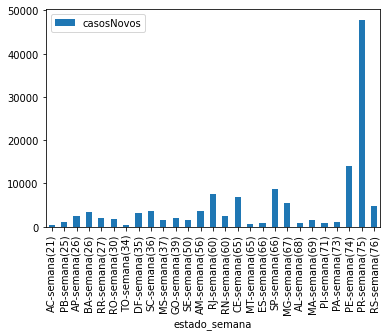

In [ ]:
# Todo: Sort by idxSemanaEpi
group_state_cases.plot('estado_semana', 'casosNovos', kind='bar')

# Número de novos casos por semana em 4 estados

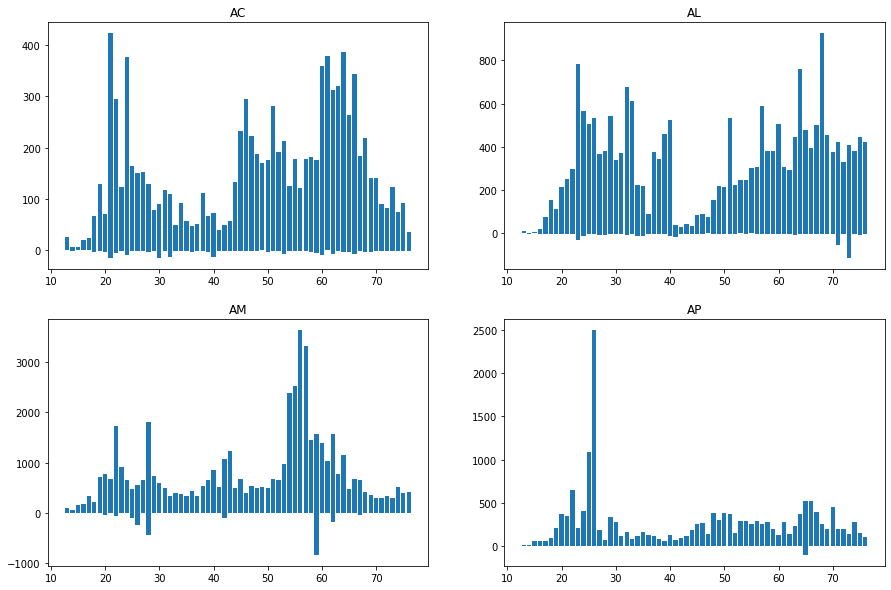

In [ ]:
# Agrupando por estado
group_states = clean_data.groupby(['estado'])

x = 0
y = 0
nRows = 2
nColumns = 2
fig, axs = plt.subplots(nRows, nColumns, figsize=(15,10))

for idx, group in enumerate(group_states):
  if idx != 0:
    if idx%nColumns == 0:
      x += 1
      y = 0
    else:
      y += 1
  axs[x,y].bar(group[1]['idxSemanaEpi'], group[1]['casosNovos'])
  axs[x,y].set_title(group[0])
  if idx == nRows*nColumns - 1:
    break

# Número de casos acumulados em regiões metropolitanas e interior


In [ ]:
# Separar dataframe em metrópole e interior
metropolitana_idx = clean_data['interior/metropolitana'] == 1
interior_idx = clean_data['interior/metropolitana'] == 0

In [ ]:
# Agrupando por região e somando todos os valores de cada coluna (metropoles)
group_regiao_cases_metropolitana = clean_data[metropolitana_idx].groupby(['regiao']).sum()

group_regiao_cases_metropolitana.reset_index(inplace=True)
group_regiao_cases_metropolitana

,regiao,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,idxSemanaEpi
0,Centro-Oeste,326801,3.289992e+09,173704488.0,913156,3833871,23889,0.0,0.0,12760.0,569647
1,Nordeste,1307204,8.777256e+09,267497747.0,1535883,9632977,48518,0.0,0.0,51040.0,2278588
2,Norte,529643,3.407837e+09,143380858.0,731441,4687802,24176,0.0,0.0,20680.0,923221
3,Sudeste,1374818,1.997695e+10,490695652.0,2797193,22316554,122841,0.0,0.0,53680.0,2396446
4,Sul,811368,3.978502e+09,140445862.0,886874,3555570,25518,0.0,0.0,31680.0,1414296


In [ ]:
# Agrupando por região e somando todos os valores de cada coluna (interior)
group_regiao_cases_interior = clean_data[interior_idx].groupby(['regiao']).sum()

group_regiao_cases_interior.reset_index(inplace=True)
group_regiao_cases_interior

,regiao,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana,idxSemanaEpi
0,Centro-Oeste,4935822,3.880721e+09,133841951.0,856580,2946221,21047,0.0,0.0,0.0,8603634
1,Nordeste,18909382,1.633427e+10,430270747.0,2479532,8718021,50299,0.0,0.0,0.0,32960954
2,Norte,4541407,4.701795e+09,178581812.0,907566,3213893,17676,0.0,0.0,0.0,7916129
3,Sudeste,17421874,1.890648e+10,531705745.0,3610897,13088827,97791,0.0,0.0,0.0,30368078
4,Sul,12610011,9.210931e+09,339064340.0,2365228,5677137,46884,0.0,0.0,0.0,21980517


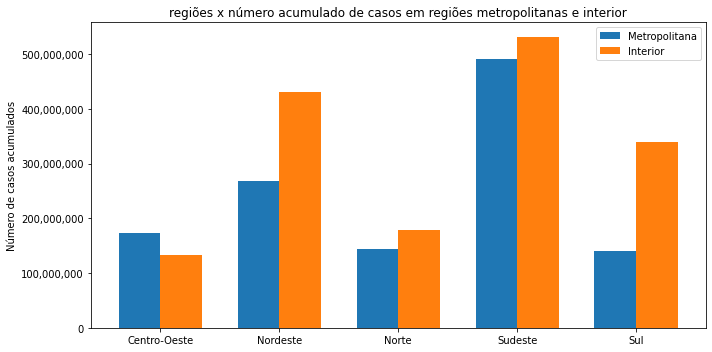

In [ ]:
regiao = group_regiao_cases['regiao']
metropolitana = group_regiao_cases_metropolitana['casosAcumulado']
interior = group_regiao_cases_interior['casosAcumulado']

x = np.arange(len(regiao))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, metropolitana, width, label='Metropolitana')
rects2 = ax.bar(x + width/2, interior, width, label='Interior')

ax.set_ylabel('Número de casos acumulados')
ax.set_title('regiões x número acumulado de casos em regiões metropolitanas e interior')
ax.set_xticks(x)
ax.set_xticklabels(regiao)
ax.legend()

import matplotlib
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.tight_layout()

plt.show()



# Número de novos casos por semana nos estados com maior e menor população


In [ ]:
# Agrupando por estado e somando
group_state_cases = clean_data.groupby(['estado']).sum()
group_state_cases.reset_index(inplace=True)


# Identificando a maior e menor população
maxPopStateIdx = group_state_cases['populacaoTCU2019'] == group_state_cases['populacaoTCU2019'].max()
minPopStateIdx = group_state_cases['populacaoTCU2019'] == group_state_cases['populacaoTCU2019'].min()

print("Estado com maior população:", group_state_cases[maxPopStateIdx]['estado'])
print("Estado com menor população:", group_state_cases[minPopStateIdx]['estado'])

Estado com maior população: 25    SP
Name: estado, dtype: object
Estado com menor população: 21    RR
Name: estado, dtype: object


In [ ]:
# Criando dataframes dos estados alvos
idx_state_min_pop = clean_data['estado'] == 'RR'
idx_state_max_pop = clean_data['estado'] == 'SP'

state_min_pop = clean_data[idx_state_min_pop]
state_max_pop = clean_data[idx_state_max_pop]

# Agrupando por semana
group_state_min_pop = state_min_pop.groupby('idxSemanaEpi').sum()
group_state_min_pop.reset_index(inplace=True)

group_state_max_pop = state_max_pop.groupby('idxSemanaEpi').sum()
group_state_max_pop.reset_index(inplace=True)

Text(0.5, 1.0, 'São Paulo (SP)')

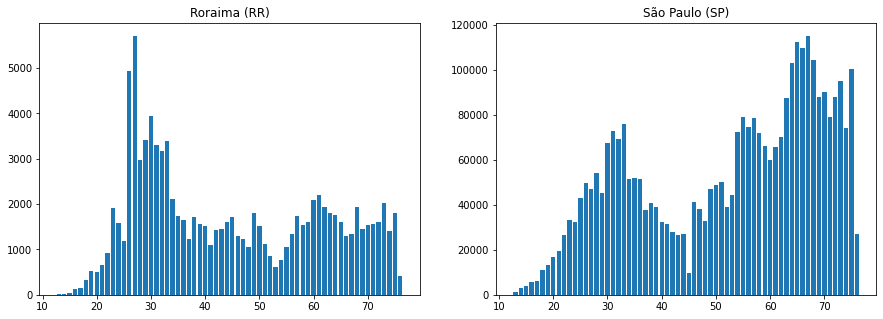

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].bar(group_state_min_pop['idxSemanaEpi'], group_state_min_pop['casosNovos'])
axs[0].set_title("Roraima (RR)")

axs[1].bar(group_state_max_pop['idxSemanaEpi'], group_state_max_pop['casosNovos'])
axs[1].set_title("São Paulo (SP)")


# Questão 6
Como seria uma distribuição dos recuperados acumulado no brasil e nas regiões?